# Classification

In [20]:
import sklearn
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv('Dades/WNCAA df')

In [22]:
df.drop(['ScoreA','ScoreB','ScoreDiff', 'DayNum', 'Round'], axis=1, inplace=True)

Es té la sospita de que els atributs TeamIdA i TeamIdB, a l'estar  codificats numèricament, poden aportar soroll al model, ja que es pot confondre. 

Es planteja l'opció de treure'ls.

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df)
dt_scaled=scaler.transform(df)
df_scaled=pd.DataFrame(dt_scaled, columns=df.columns)

from sklearn.utils import shuffle
np.random.seed(1234) #perque desordeni les dades sempre igual
dt = pd.DataFrame(shuffle(df_scaled))

In [24]:
X=dt.iloc[:,:-1]
y=dt.iloc[:,-1]

## **Model evaluation using cross_val_score**

cross_val_score uses statifield kfold by default

In [25]:
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score

### **Amb els atributs TeamIDA i TeamIDB**

In [26]:
lr = cross_val_score(LogisticRegression(max_iter=1000), X, y)
svm = cross_val_score(SVC(), X, y)
rf = cross_val_score(RandomForestClassifier(), X, y)
knn = cross_val_score(KNeighborsClassifier(), X, y)
dtree= cross_val_score(tree.DecisionTreeClassifier(), X, y)
gb= cross_val_score(GradientBoostingClassifier(), X, y)
gaus= cross_val_score(GaussianNB(), X, y)

data=[lr, svm, rf, knn, dtree, gb, gaus]
mean=[lr.mean(), svm.mean(), rf.mean(), knn.mean(), dtree.mean(), gb.mean(), gaus.mean()]
std=[lr.std(), svm.std(), rf.std(), knn.std(), dtree.std(), gb.std(), gaus.std()]

results= pd.DataFrame(data)
results['Method']=['Logistic Regression', 'SVM','Random Forest', 'KNN', 'Decision Tree', 'Gradient Boosting', 'Naïve Bayes']
results['Mean']= mean
results['Std']=std
results

,0,1,2,3,4,Method,Mean,Std
0,0.751799,0.790614,0.794224,0.808664,0.808664,Logistic Regression,0.790793,0.020838
1,0.762590,0.794224,0.794224,0.794224,0.815884,SVM,0.792229,0.017029
2,0.751799,0.761733,0.768953,0.797834,0.768953,Random Forest,0.769854,0.015339
3,0.697842,0.801444,0.761733,0.743682,0.761733,KNN,0.753287,0.033551
4,0.719424,0.682310,0.736462,0.729242,0.714801,Decision Tree,0.716448,0.018661
5,0.733813,0.761733,0.787004,0.787004,0.779783,Gradient Boosting,0.769867,0.020257
6,0.755396,0.797834,0.779783,0.779783,0.794224,Naïve Bayes,0.781404,0.014940


### **Sense els atributs TeamIDA i TeamIDB**

In [27]:
dt_sense = dt 
dt_sense.drop(['TeamIdA','TeamIdB'], axis=1, inplace=True)
X1=dt_sense.iloc[:,:-1]
y1=dt_sense.iloc[:,-1]

In [28]:
lr = cross_val_score(LogisticRegression(max_iter=1000), X1, y1)
svm = cross_val_score(SVC(), X1, y1)
rf = cross_val_score(RandomForestClassifier(), X1, y1)
knn = cross_val_score(KNeighborsClassifier(), X1, y1)
dtree= cross_val_score(tree.DecisionTreeClassifier(), X1, y1)
gb= cross_val_score(GradientBoostingClassifier(), X1, y1)
gaus= cross_val_score(GaussianNB(), X1, y1)

data=[lr, svm, rf, knn, dtree, gb, gaus]
mean=[lr.mean(), svm.mean(), rf.mean(), knn.mean(), dtree.mean(), gb.mean(), gaus.mean()]
std=[lr.std(), svm.std(), rf.std(), knn.std(), dtree.std(), gb.std(), gaus.std()]

results= pd.DataFrame(data)
results['Method']=['Logistic Regression', 'SVM','Random Forest', 'KNN', 'Decision Tree', 'Gradient Boosting', 'Naïve Bayes']
results['Mean']= mean
results['Std']=std
results

,0,1,2,3,4,Method,Mean,Std
0,0.758993,0.790614,0.794224,0.801444,0.805054,Logistic Regression,0.790066,0.016354
1,0.755396,0.787004,0.794224,0.783394,0.801444,SVM,0.784292,0.015723
2,0.719424,0.761733,0.747292,0.776173,0.761733,Random Forest,0.753271,0.019230
3,0.715827,0.754513,0.776173,0.768953,0.754513,KNN,0.753996,0.020847
4,0.676259,0.678700,0.711191,0.685921,0.718412,Decision Tree,0.694097,0.017352
5,0.730216,0.783394,0.783394,0.787004,0.768953,Gradient Boosting,0.770592,0.021119
6,0.758993,0.797834,0.768953,0.772563,0.797834,Naïve Bayes,0.779235,0.015823


Com em canviaven cada vegada he afegit el np.random.seed() al principi.

Em quedo amb la opció sense els atributs TeamIdA i TeamIdB perquè no em convenç.

In [29]:
dt=dt_sense
X=X1
y=y1

### **Parameter tunning with Grid Search**

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [31]:
from sklearn.model_selection import train_test_split
np.random.seed(1234)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [32]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [33]:
ths=dt.shape[0]*2//3
training=dt.iloc[:ths,:-1]
training_labels=dt.iloc[:ths,-1]
test=dt.iloc[ths:,:-1]
test_labels=dt.iloc[ths:,-1]

In [34]:
from sklearn.metrics import accuracy_score
def classification(clf):
  clf.fit(training,training_labels)
  preds = pd.Series(clf.predict(test), name='preds')
  reals = pd.Series(test_labels, name='reals')
  reals.index = range(dt.shape[0]-ths)
  print('accuracy: ' + str(accuracy_score(reals,preds)))
  display(pd.crosstab(reals,preds))

 #### SVM

In [35]:
print('linear: ' + str(get_score(SVC(kernel='linear'),X_train, X_test, y_train, y_test)))
print('poly: ' + str(get_score(SVC(kernel='poly'),X_train, X_test, y_train, y_test)))
print('rbf: ' + str(get_score(SVC(kernel='rbf'),X_train, X_test, y_train, y_test)))

linear: 0.8076923076923077
poly: 0.7644230769230769
rbf: 0.7884615384615384


em quedo amb'rbf'

In [36]:
param_grid_svm = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [100, 10, 1, 0.1, 0.01]}

grid = GridSearchCV(SVC(kernel='rbf'), param_grid_svm, scoring='neg_mean_squared_error', return_train_score=True)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 1000, 'gamma': 0.1}
SVC(C=1000, gamma=0.1)


0.7012507235786554 {'C': 0.1, 'gamma': 100}
0.48482114887012984 {'C': 0.1, 'gamma': 10}
0.4805495136315782 {'C': 0.1, 'gamma': 1}
0.4848211488701298 {'C': 0.1, 'gamma': 0.1}
0.7005152742692596 {'C': 0.1, 'gamma': 0.01}
0.6032557714379498 {'C': 1, 'gamma': 100}
0.49220731530231593 {'C': 1, 'gamma': 10}
0.4686017806901499 {'C': 1, 'gamma': 1}
0.47623956546190094 {'C': 1, 'gamma': 0.1}
0.48588318989938734 {'C': 1, 'gamma': 0.01}
0.6006868920394728 {'C': 10, 'gamma': 100}
0.5616617465394748 {'C': 10, 'gamma': 10}
0.4686017806901499 {'C': 10, 'gamma': 1}
0.4652900658307942 {'C': 10, 'gamma': 0.1}
0.47515597005224364 {'C': 10, 'gamma': 0.01}
0.6006868920394728 {'C': 100, 'gamma': 100}
0.566231893044741 {'C': 100, 'gamma': 10}
0.4740698978433846 {'C': 100, 'gamma': 1}
0.4641809103418334 {'C': 100, 'gamma': 0.1}
0.46418091034183345 {'C': 100, 'gamma': 0.01}
0.6006868920394728 {'C': 1000, 'gamma': 100}
0.5653208194167091 {'C': 1000, 'gamma': 10}
0.5096997296771794 {'C': 1000, 'gamma': 1}
0.4608

<function matplotlib.pyplot.show(close=None, block=None)>

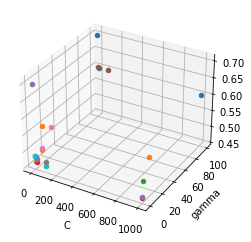

In [37]:
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()
ax1 = fig.add_subplot(111,projection='3d')

cvres_svm=grid.cv_results_
for mean_score, params in zip(cvres_svm['mean_test_score'], cvres_svm['params']):
  print(np.sqrt(-mean_score), params)
  ax1.scatter(params['C'], params['gamma'], np.sqrt(-mean_score))

plt.ylabel('gamma')
plt.xlabel('C')
plt.show

El millor RMSE score és 0.4619546101682178 i s'aconsegueix amb {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [38]:
svm=SVC(C=100, gamma=0.01).fit(training,training_labels)
preds = pd.Series(svm.predict(test), name='preds')
reals = pd.Series(test_labels, name='reals')
reals.index = range(dt.shape[0]-ths)
print('accuracy: ' + str(accuracy_score(reals,preds)))
display(pd.crosstab(reals,preds))

accuracy: 0.803030303030303


preds,0.0,1.0
reals,,
0.0,183,41
1.0,50,188


#### Logistic Regression

In [39]:
param_grid_logreg={'C': [0.1, 1, 10, 100, 1000, 10000]}

grid_logreg = GridSearchCV(LogisticRegression(penalty='l2', max_iter=1000), param_grid_logreg, scoring='neg_mean_squared_error', return_train_score=True)
grid_logreg.fit(X_train, y_train)
print(grid_logreg.best_params_)
print(grid_logreg.best_estimator_)

{'C': 1000}
LogisticRegression(C=1000, max_iter=1000)


0.4783993931658393 {'C': 0.1}
0.4641809103418334 {'C': 1}
0.45971752869078963 {'C': 10}
0.45971752869078963 {'C': 100}
0.4585948956873762 {'C': 1000}
0.4585948956873762 {'C': 10000}


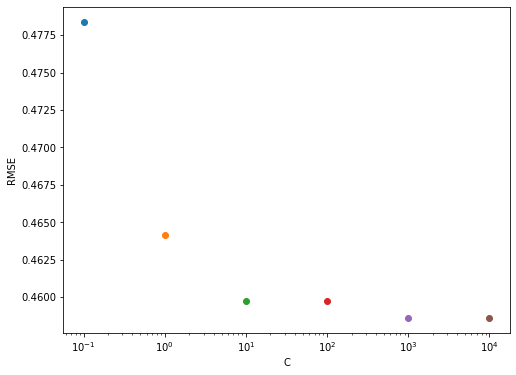

In [40]:
cvres_logreg=grid_logreg.cv_results_
plt.figure(figsize=(8, 6))
for mean_score, params in zip(cvres_logreg['mean_test_score'], cvres_logreg['params']):
  print(np.sqrt(-mean_score), params)
  plt.scatter(params['C'], np.sqrt(-mean_score))

plt.xscale('log')
plt.ylabel('RMSE')
plt.xlabel('C')    
plt.show()


menor RMSE és 0.46860178069014996 i s'aconsegueix amb {'C': 10}

In [41]:
classification(LogisticRegression(C=10, max_iter=1000))

accuracy: 0.8095238095238095


preds,0.0,1.0
reals,,
0.0,183,41
1.0,47,191


### Naive Bayes

In [42]:
param_grid_nb = {'var_smoothing': np.logspace(0,-5, num=25)}
grid_nb = GridSearchCV(GaussianNB(), param_grid_nb, scoring='neg_mean_squared_error', return_train_score=True)
grid_nb.fit(X_train, y_train)
print(grid_nb.best_params_)
print(grid_nb.best_estimator_)

{'var_smoothing': 0.14677992676220694}
GaussianNB(var_smoothing=0.14677992676220694)


0.4805495136315782 {'var_smoothing': 1.0}
0.47947565862772934 {'var_smoothing': 0.6189658188912606}
0.4826900565804618 {'var_smoothing': 0.38311868495572876}
0.4805495136315782 {'var_smoothing': 0.23713737056616552}
0.4783993931658393 {'var_smoothing': 0.14677992676220694}
0.4805495136315782 {'var_smoothing': 0.09085175756516867}
0.483756776238536 {'var_smoothing': 0.05623413251903491}
0.4826900565804618 {'var_smoothing': 0.03480700588428409}
0.4848211488701298 {'var_smoothing': 0.021544346900318832}
0.48588318989938734 {'var_smoothing': 0.01333521432163324}
0.48800033800900916 {'var_smoothing': 0.008254041852680182}
0.48800033800900916 {'var_smoothing': 0.005108969774506924}
0.48800033800900916 {'var_smoothing': 0.0031622776601683794}
0.48800033800900916 {'var_smoothing': 0.0019573417814876598}
0.48800033800900916 {'var_smoothing': 0.0012115276586285877}
0.48800033800900916 {'var_smoothing': 0.0007498942093324559}
0.48800033800900916 {'var_smoothing': 0.00046415888336127773}
0.4880003

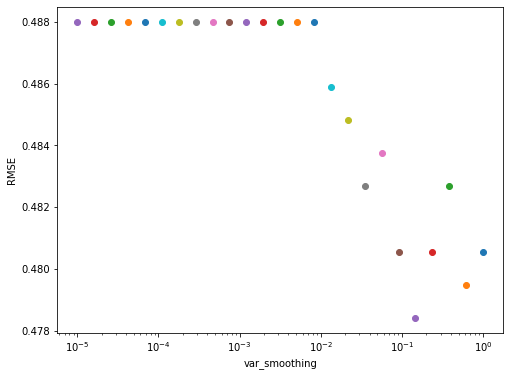

In [43]:
cvres_nb=grid_nb.cv_results_
plt.figure(figsize=(8, 6))
for mean_score, params in zip(cvres_nb['mean_test_score'], cvres_nb['params']):
  print(np.sqrt(-mean_score), params)
  plt.scatter(params['var_smoothing'], np.sqrt(-mean_score))

plt.xscale('log')
plt.ylabel('RMSE')
plt.xlabel('var_smoothing')    
plt.show()

El menor RMSE és 0.4707966488156882 i s'aconsegueix amb {'var_smoothing': 0.10481131341546858}

In [44]:
classification(GaussianNB(var_smoothing=0.09085175756516867))

accuracy: 0.79004329004329


preds,0.0,1.0
reals,,
0.0,177,47
1.0,50,188


### Random Forest

In [45]:
max_depth=[2, 4]
n_estimators = [int(x) for x in np.linspace(start=10, stop=80, num=5)]
min_samples_split=[2,5]
param_grid_rf = dict(max_depth=max_depth, n_estimators=n_estimators, min_samples_split=min_samples_split)
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, scoring='neg_mean_squared_error', return_train_score=True)
grid_rf.fit(X_train, y_train)
print(grid_rf.best_params_)
print(grid_rf.best_estimator_)

{'max_depth': 4, 'min_samples_split': 5, 'n_estimators': 45}
RandomForestClassifier(max_depth=4, min_samples_split=5, n_estimators=45)


0.4805495136315782 {'max_depth': 2, 'min_samples_split': 2, 'n_estimators': 10}
0.4718902545837687 {'max_depth': 2, 'min_samples_split': 2, 'n_estimators': 27}
0.47839939316583935 {'max_depth': 2, 'min_samples_split': 2, 'n_estimators': 45}
0.47515597005224364 {'max_depth': 2, 'min_samples_split': 2, 'n_estimators': 62}
0.47298133177344914 {'max_depth': 2, 'min_samples_split': 2, 'n_estimators': 80}
0.47623956546190094 {'max_depth': 2, 'min_samples_split': 5, 'n_estimators': 10}
0.4740698978433846 {'max_depth': 2, 'min_samples_split': 5, 'n_estimators': 27}
0.4718902545837687 {'max_depth': 2, 'min_samples_split': 5, 'n_estimators': 45}
0.47515597005224364 {'max_depth': 2, 'min_samples_split': 5, 'n_estimators': 62}
0.47839939316583935 {'max_depth': 2, 'min_samples_split': 5, 'n_estimators': 80}
0.47623956546190094 {'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 10}
0.4675004823857702 {'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 27}
0.46306909818160147 {'max_depth':

<function matplotlib.pyplot.show(close=None, block=None)>

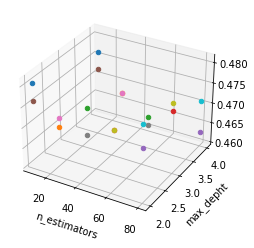

In [46]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

cvres_rf=grid_rf.cv_results_
for mean_score, params in zip(cvres_rf['mean_test_score'], cvres_rf['params']):
  print(np.sqrt(-mean_score), params)
  ax.scatter(params['n_estimators'], params['max_depth'], np.sqrt(-mean_score))

plt.ylabel('max_depht')
plt.xlabel('n_estimators')
plt.show

In [47]:
classification(RandomForestClassifier(max_depth=4, min_samples_split=5, n_estimators=62))

accuracy: 0.7748917748917749


preds,0.0,1.0
reals,,
0.0,173,51
1.0,53,185


# Test

In [49]:
df_test = pd.read_csv('Dades/WNCAA df_test.csv')
df_test.drop(['ID', 'Pred'], axis=1, inplace=True)
df_test['WinA']=0
df_test.head()
df_test_scaled=scaler.transform(df_test)
dt_test_scaled=pd.DataFrame(df_test_scaled, columns=df_test.columns)
dt_test_scaled.drop(['WinA', 'TeamIdA', 'TeamIdB'], axis=1,inplace=True)
dt_test_scaled.head()

,Season,SeedA,SeedB,WinRatioA,GapAvgA,WinRatioB,GapAvgB,SeedDiff,WinRatioDiff,GapAvgDiff
0,1.095238,0.4,0.133333,0.364706,0.217268,0.565826,0.321967,0.633333,0.369753,0.440232
1,1.095238,0.4,0.200000,0.364706,0.217268,0.459695,0.289206,0.600000,0.424477,0.458807
2,1.095238,0.4,0.066667,0.364706,0.217268,0.864924,0.678590,0.666667,0.215531,0.238037
3,1.095238,0.4,0.733333,0.364706,0.217268,0.635294,0.360585,0.333333,0.333934,0.418337
4,1.095238,0.4,0.666667,0.364706,0.217268,0.257081,0.194448,0.366667,0.528950,0.512532


In [50]:
predicció = pd.Series(svm.predict(dt_test_scaled), name='preds')

In [51]:
df_test['WinA']=predicció
df_test.head()

,Season,TeamIdA,TeamIdB,SeedA,SeedB,WinRatioA,GapAvgA,WinRatioB,GapAvgB,SeedDiff,WinRatioDiff,GapAvgDiff,WinA
0,2021,3104,3112,7,3,0.64,4.76,0.761905,10.523810,4,-0.121905,-5.763810,0.0
1,2021,3104,3116,7,4,0.64,4.76,0.703704,9.000000,3,-0.063704,-4.240000,0.0
2,2021,3104,3124,7,2,0.64,4.76,0.925926,27.111111,5,-0.285926,-22.351111,0.0
3,2021,3104,3125,7,12,0.64,4.76,0.800000,12.320000,-5,-0.160000,-7.560000,1.0
4,2021,3104,3133,7,11,0.64,4.76,0.592593,4.592593,-4,0.047407,0.167407,1.0


In [52]:
wins=df_test.groupby(df_test['WinA']==1)
wins.size()

WinA
False     920
True     1096
dtype: int64

In [53]:
teams = pd.read_csv('Dades/WTeams.csv')


In [54]:
teams[teams['TeamName']=='Lehigh']

,TeamID,TeamName
148,3250,Lehigh


Per muntar el Bracket: 

In [55]:
A='Connecticut'
B='Stanford'
IDA = teams[teams['TeamName']==A]
IDB = teams[teams['TeamName']==B]
TeamIDA=IDA.iloc[0,0]
TeamIDB=IDB.iloc[0,0]
c=df_test[df_test['TeamIdA']==TeamIDA]
d=c[c['TeamIdB']==TeamIDB]
if d.iloc[0,-1]==1.0:
  print(A)
elif d.iloc[0,-1]==0.0:  
  print(B)

Connecticut
